# Exploratory Data Analysis: Synthetic SaaS Data

This notebook analyzes the synthetic datasets we generated:
1. **Subscriptions Table** - Customer subscription plans and status
2. **Invoices Table** - Billing records and payment status

## Key Questions to Explore:
- Subscription distribution and trends
- Revenue patterns and churn analysis
- Payment behavior and late payment patterns
- Customer lifecycle analysis

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the datasets
print("Loading datasets...")
subscriptions = pd.read_csv('subscriptions.csv')
invoices = pd.read_csv('invoices.csv')

print(f"Subscriptions dataset: {subscriptions.shape}")
print(f"Invoices dataset: {invoices.shape}")

# Display basic info
print("\nSubscriptions columns:", subscriptions.columns.tolist())
print("Invoices columns:", invoices.columns.tolist())

Loading datasets...
Subscriptions dataset: (661004, 7)
Invoices dataset: (9615123, 6)

Subscriptions columns: ['SubscriptionID', 'CustomerID', 'SubscriptionType', 'ContractLength', 'StartDate', 'EndDate', 'IsActive']
Invoices columns: ['InvoiceID', 'SubscriptionID', 'InvoiceDate', 'Amount', 'PaidLate', 'Status']


In [4]:
# Basic data exploration
print("=== SUBSCRIPTIONS DATASET ===")
print(subscriptions.info())
print("\nFirst few rows:")
display(subscriptions.head())

print("\n=== INVOICES DATASET ===")
print(invoices.info())
print("\nFirst few rows:")
display(invoices.head())

=== SUBSCRIPTIONS DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661004 entries, 0 to 661003
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SubscriptionID    661004 non-null  int64  
 1   CustomerID        661004 non-null  float64
 2   SubscriptionType  661004 non-null  object 
 3   ContractLength    661004 non-null  object 
 4   StartDate         661004 non-null  object 
 5   EndDate           331870 non-null  object 
 6   IsActive          661004 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 30.9+ MB
None

First few rows:


,SubscriptionID,CustomerID,SubscriptionType,ContractLength,StartDate,EndDate,IsActive
0,1,2.0,Basic,Annual,2018-12-06,2019-03-17,False
1,2,3.0,Premium,Quarterly,2019-12-01,2020-08-01,False
2,3,4.0,Basic,Annual,2020-06-13,2021-05-17,False
3,4,5.0,Standard,Quarterly,2019-09-11,NaN,True
4,5,5.0,Basic,Monthly,2019-11-24,NaN,True



=== INVOICES DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9615123 entries, 0 to 9615122
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InvoiceID       int64  
 1   SubscriptionID  int64  
 2   InvoiceDate     object 
 3   Amount          float64
 4   PaidLate        bool   
 5   Status          object 
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 376.0+ MB
None

First few rows:


,InvoiceID,SubscriptionID,InvoiceDate,Amount,PaidLate,Status
0,1,2,2019-12-01,219.99,False,Paid
1,2,2,2020-02-29,219.99,False,Paid
2,3,4,2019-09-11,109.99,False,Paid
3,4,4,2019-12-10,109.99,False,Paid
4,5,4,2020-03-09,109.99,False,Paid


In [5]:
# Convert date columns to datetime
subscriptions['StartDate'] = pd.to_datetime(subscriptions['StartDate'])
subscriptions['EndDate'] = pd.to_datetime(subscriptions['EndDate'], errors='coerce')
invoices['InvoiceDate'] = pd.to_datetime(invoices['InvoiceDate'])

print("Date columns converted to datetime format")

Date columns converted to datetime format


In [8]:
subscriptions.rename(columns={
    'SubscriptionID': 'subscription_id',
    'CustomerID' : 'customer_id',
    'SubscriptionType': 'subscription_type',
    'ContractLength' : 'contract_length',
    'StartDate' : 'start_date',
    'EndDate' : 'end_date',
    'IsActive' : 'is_active'
}, inplace=True)

subscriptions.head()

,subscription_id,customer_id,subscription_type,contract_length,start_date,end_date,is_active
0,1,2.0,Basic,Annual,2018-12-06,2019-03-17,False
1,2,3.0,Premium,Quarterly,2019-12-01,2020-08-01,False
2,3,4.0,Basic,Annual,2020-06-13,2021-05-17,False
3,4,5.0,Standard,Quarterly,2019-09-11,NaT,True
4,5,5.0,Basic,Monthly,2019-11-24,NaT,True


In [9]:
subscriptions['customer_id'] = subscriptions['customer_id'].astype('Int64')
subscriptions.to_csv("subscriptions_clean.csv", index=False)

In [ ]:
df.rename(columns={
    'InvoiceID': 'invoice_id',
    'SubscriptionID': 'subscription_id',
    'InvoiceDate': 'invoice_date',
    'Amount': 'amount',
    'PaidLate': 'paid_late',
    'Status': 'status'
}, inplace=True)


In [10]:
invoices.rename(columns={
    'InvoiceID': 'invoice_id',
    'SubscriptionID': 'subscription_id',
    'InvoiceDate': 'invoice_date',
    'Amount': 'amount',
    'PaidLate': 'paid_late',
    'Status': 'status'
}, inplace=True)

invoices.to_csv("invoices_clean.csv", index=False)

## 1. Subscriptions Analysis

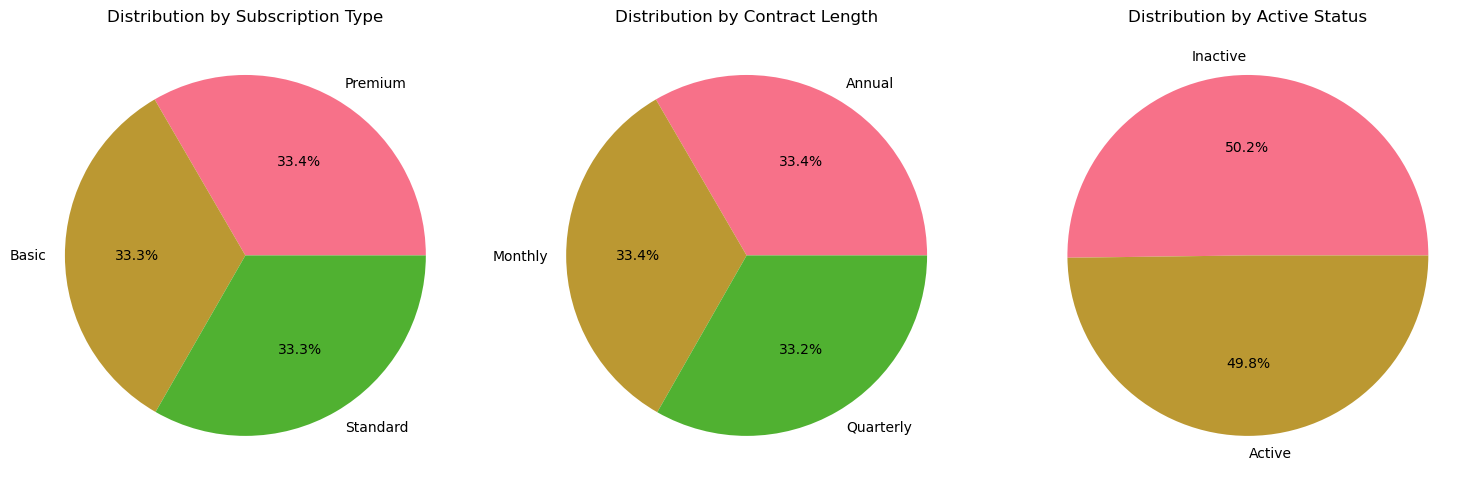

Subscription Type Distribution:
SubscriptionType
Premium     220666
Basic       220286
Standard    220052
Name: count, dtype: int64

Contract Length Distribution:
ContractLength
Annual       220658
Monthly      220594
Quarterly    219752
Name: count, dtype: int64

Active Status Distribution:
IsActive
False    331870
True     329134
Name: count, dtype: int64


In [5]:
# Subscription distribution by type
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
subscription_type_counts = subscriptions['SubscriptionType'].value_counts()
plt.pie(subscription_type_counts.values, labels=subscription_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution by Subscription Type')

plt.subplot(1, 3, 2)
contract_length_counts = subscriptions['ContractLength'].value_counts()
plt.pie(contract_length_counts.values, labels=contract_length_counts.index, autopct='%1.1f%%')
plt.title('Distribution by Contract Length')

plt.subplot(1, 3, 3)
active_counts = subscriptions['IsActive'].value_counts()
plt.pie(active_counts.values, labels=['Inactive', 'Active'], autopct='%1.1f%%')
plt.title('Distribution by Active Status')

plt.tight_layout()
plt.show()

# Display counts
print("Subscription Type Distribution:")
print(subscription_type_counts)
print("\nContract Length Distribution:")
print(contract_length_counts)
print("\nActive Status Distribution:")
print(active_counts)

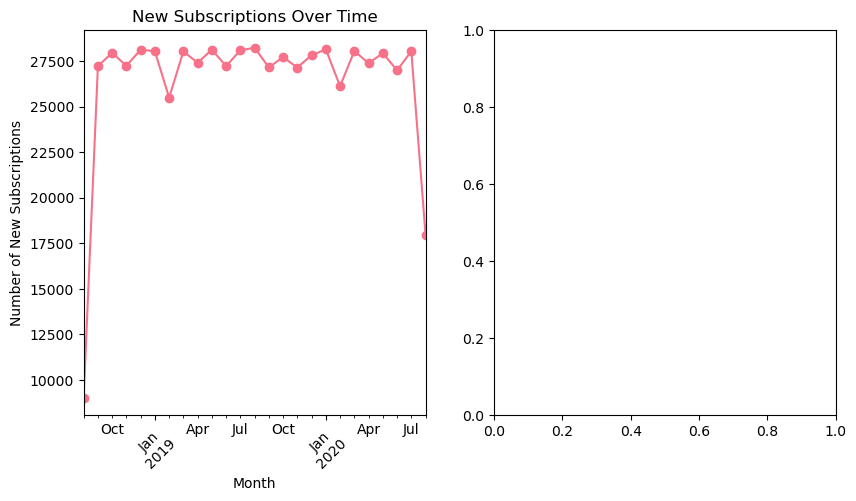

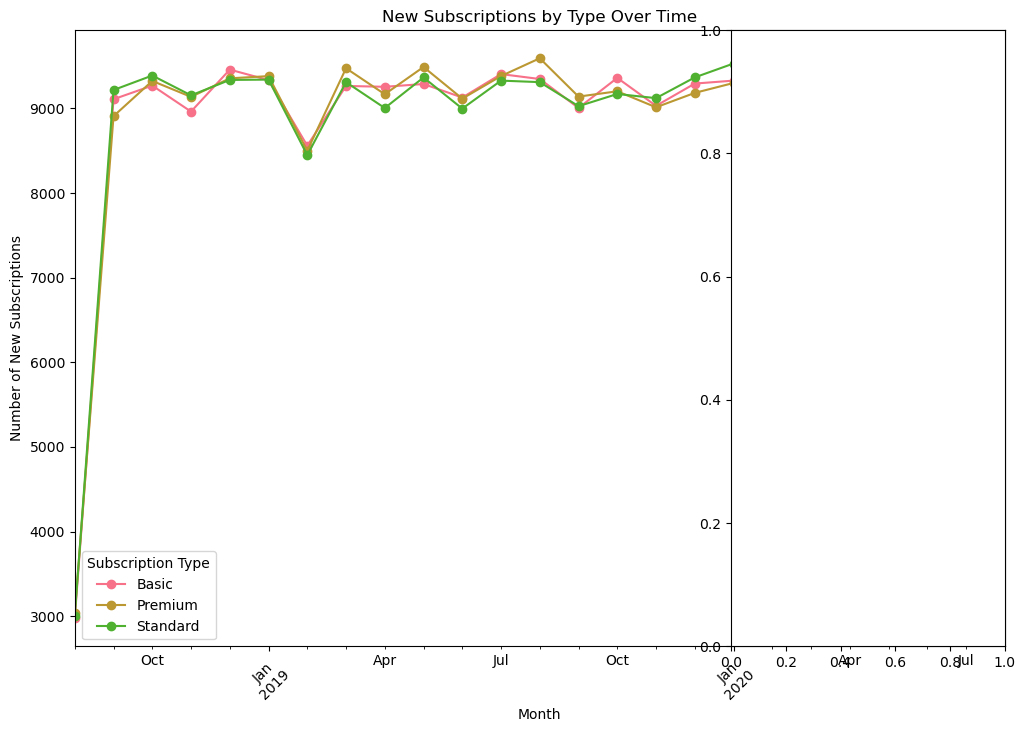

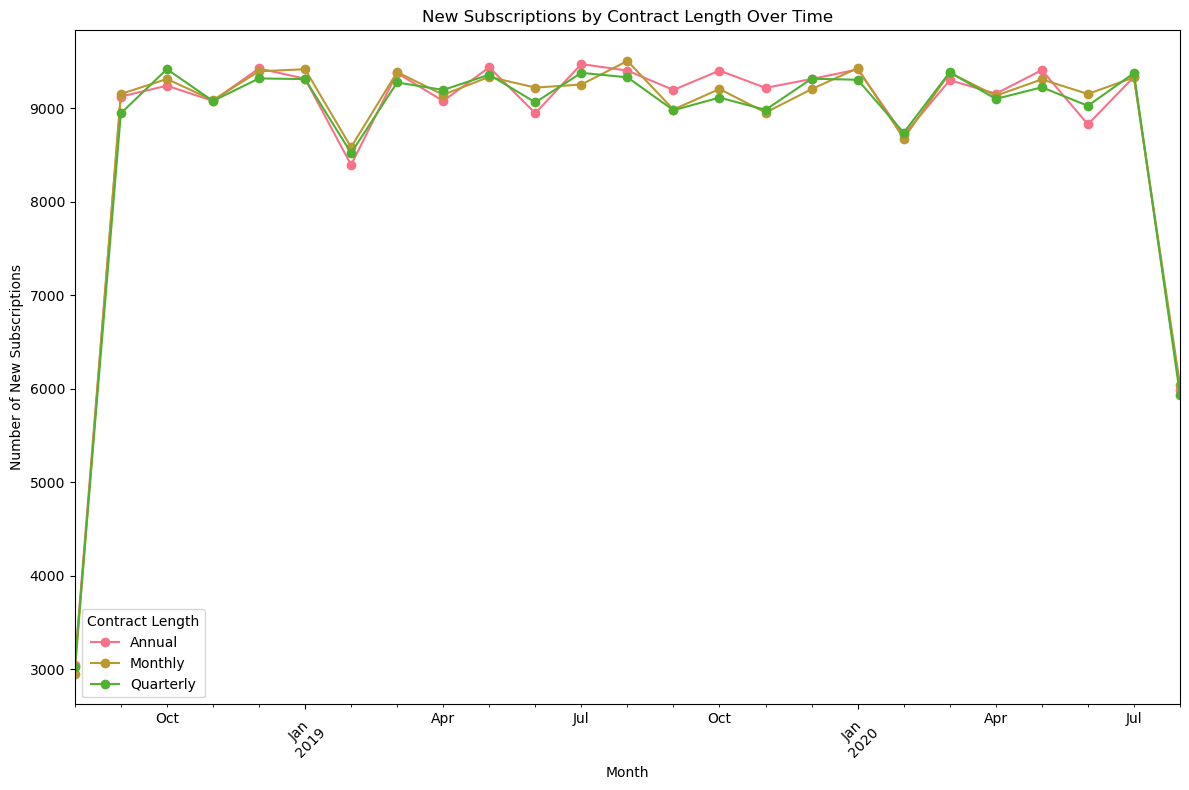

In [6]:
# Subscription trends over time
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
monthly_subscriptions = subscriptions.groupby(subscriptions['StartDate'].dt.to_period('M')).size()
monthly_subscriptions.plot(kind='line', marker='o')
plt.title('New Subscriptions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of New Subscriptions')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
subscriptions_by_type = subscriptions.groupby([subscriptions['StartDate'].dt.to_period('M'), 'SubscriptionType']).size().unstack()
subscriptions_by_type.plot(kind='line', marker='o')
plt.title('New Subscriptions by Type Over Time')
plt.xlabel('Month')
plt.ylabel('Number of New Subscriptions')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')

plt.subplot(1, 3, 3)
subscriptions_by_contract = subscriptions.groupby([subscriptions['StartDate'].dt.to_period('M'), 'ContractLength']).size().unstack()
subscriptions_by_contract.plot(kind='line', marker='o')
plt.title('New Subscriptions by Contract Length Over Time')
plt.xlabel('Month')
plt.ylabel('Number of New Subscriptions')
plt.xticks(rotation=45)
plt.legend(title='Contract Length')

plt.tight_layout()
plt.show()

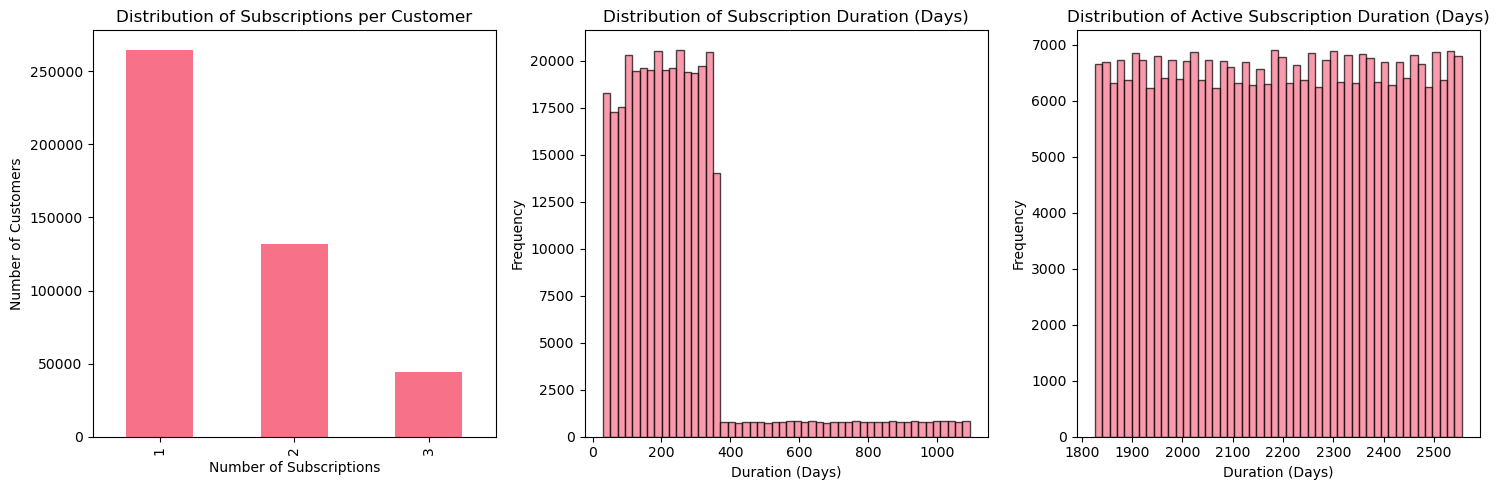

Average subscriptions per customer: 1.50
Median subscriptions per customer: 1.00
Average subscription duration (ended): 243.4 days
Average active subscription duration: 2191.0 days


In [7]:
# Customer subscription patterns
customer_subscription_counts = subscriptions.groupby('CustomerID').size()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
customer_subscription_counts.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Subscriptions per Customer')
plt.xlabel('Number of Subscriptions')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
subscription_duration = (subscriptions['EndDate'] - subscriptions['StartDate']).dt.days
subscription_duration = subscription_duration[subscription_duration.notna()]
plt.hist(subscription_duration, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Subscription Duration (Days)')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
active_subscriptions = subscriptions[subscriptions['IsActive'] == True]
active_duration = (datetime.now() - active_subscriptions['StartDate']).dt.days
plt.hist(active_duration, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Active Subscription Duration (Days)')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Average subscriptions per customer: {customer_subscription_counts.mean():.2f}")
print(f"Median subscriptions per customer: {customer_subscription_counts.median():.2f}")
print(f"Average subscription duration (ended): {subscription_duration.mean():.1f} days")
print(f"Average active subscription duration: {active_duration.mean():.1f} days")

## 2. Invoices Analysis

Amount statistics by status:


,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Paid,9615123.0,98.652672,130.776052,19.99,39.99,54.99,109.99,799.99


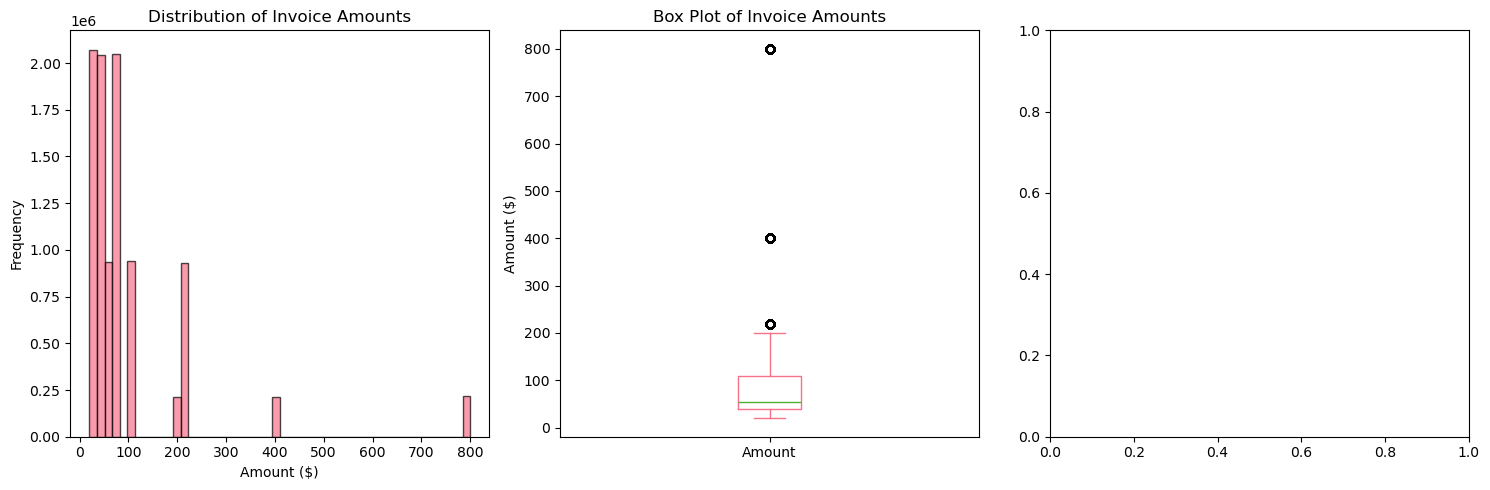

Total revenue: $948,557,573.77
Average invoice amount: $98.65
Median invoice amount: $54.99


In [8]:
# Invoice amount distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(invoices['Amount'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Invoice Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
invoices['Amount'].plot(kind='box')
plt.title('Box Plot of Invoice Amounts')
plt.ylabel('Amount ($)')

plt.subplot(1, 3, 3)
amount_stats = invoices.groupby('Status')['Amount'].describe()
print("Amount statistics by status:")
display(amount_stats)

plt.tight_layout()
plt.show()

print(f"Total revenue: ${invoices['Amount'].sum():,.2f}")
print(f"Average invoice amount: ${invoices['Amount'].mean():.2f}")
print(f"Median invoice amount: ${invoices['Amount'].median():.2f}")

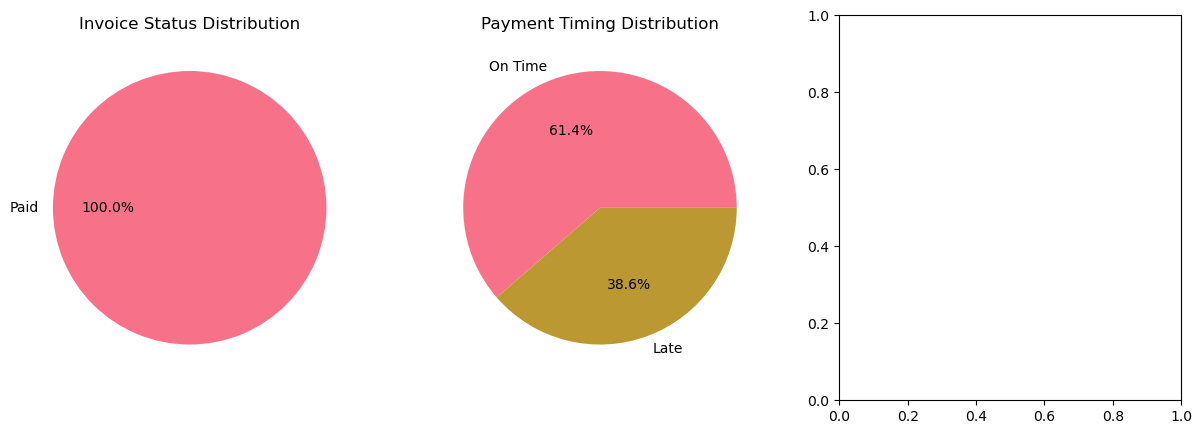

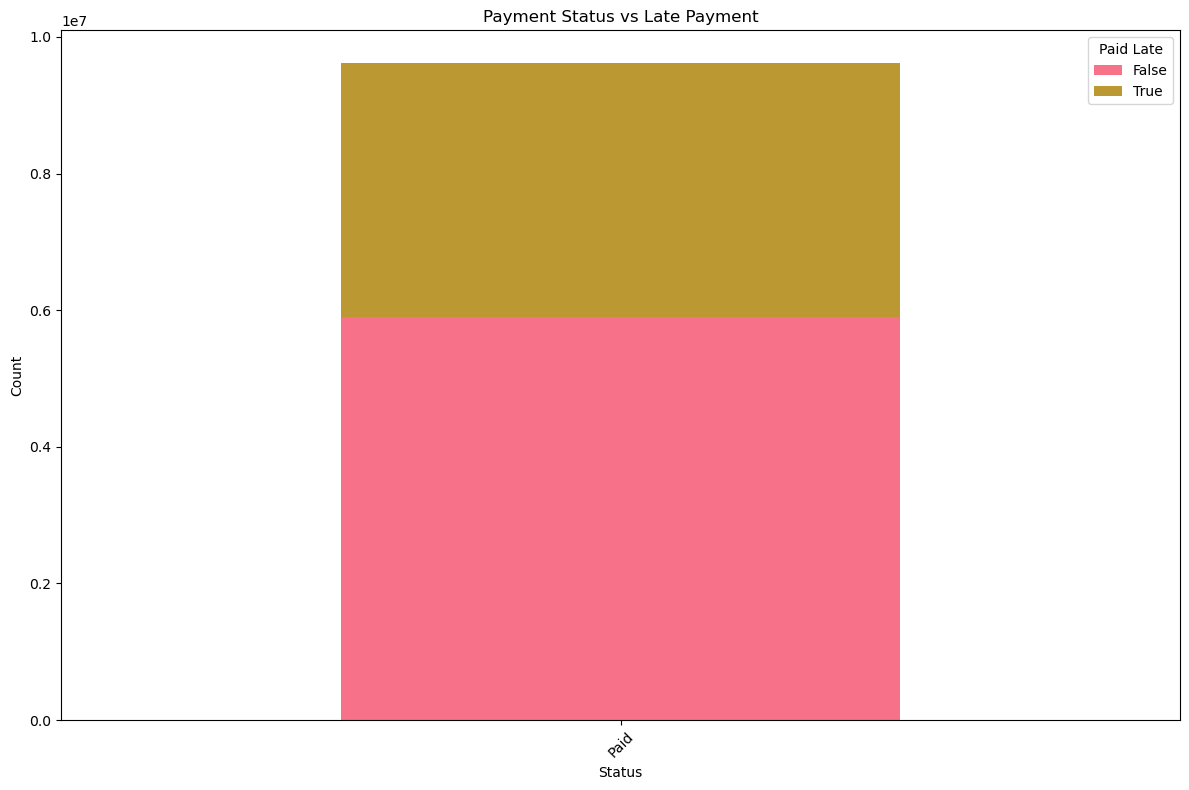

Payment Status Distribution:
Status
Paid    9615123
Name: count, dtype: int64

Late Payment Distribution:
PaidLate
False    5902142
True     3712981
Name: count, dtype: int64

Late Payment by Status:


PaidLate,False,True
Status,,
Paid,5902142,3712981


In [9]:
# Payment status and late payment analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
status_counts = invoices['Status'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Invoice Status Distribution')

plt.subplot(1, 3, 2)
late_payment_counts = invoices['PaidLate'].value_counts()
plt.pie(late_payment_counts.values, labels=['On Time', 'Late'], autopct='%1.1f%%')
plt.title('Payment Timing Distribution')

plt.subplot(1, 3, 3)
late_by_status = pd.crosstab(invoices['Status'], invoices['PaidLate'])
late_by_status.plot(kind='bar', stacked=True)
plt.title('Payment Status vs Late Payment')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(title='Paid Late')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Payment Status Distribution:")
print(status_counts)
print("\nLate Payment Distribution:")
print(late_payment_counts)
print("\nLate Payment by Status:")
display(late_by_status)

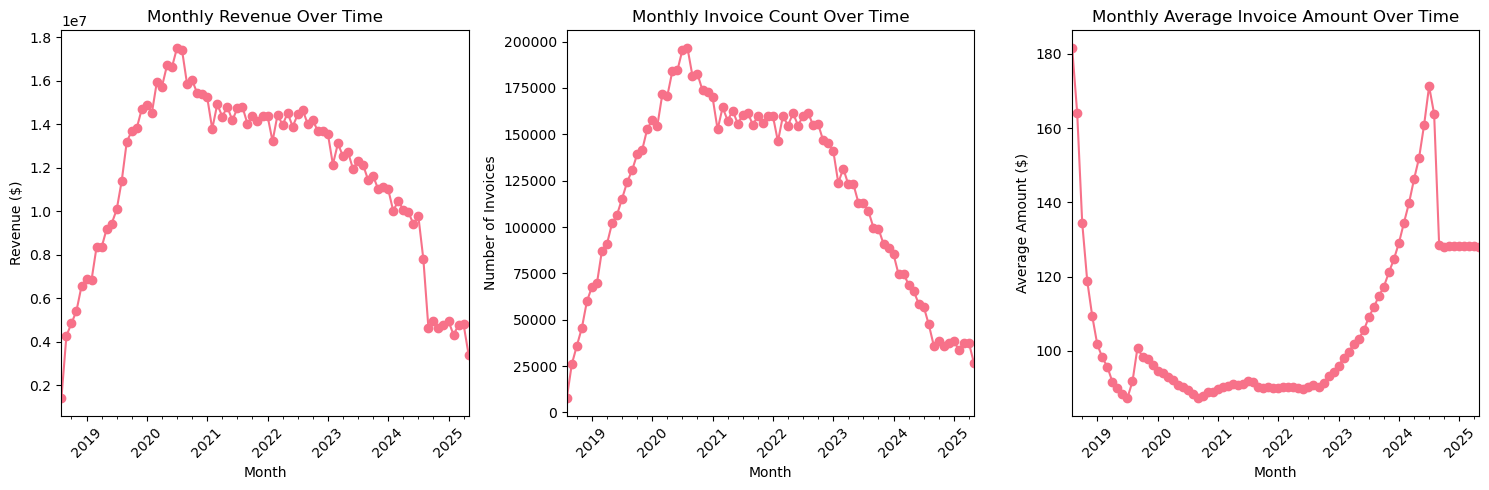

Total monthly revenue range: $1,393,748.27 - $17,513,895.30
Average monthly revenue: $11,567,775.29
Total monthly invoice range: 7,673 - 196,642
Average monthly invoices: 117,258


In [10]:
# Revenue trends over time
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
monthly_revenue = invoices.groupby(invoices['InvoiceDate'].dt.to_period('M'))['Amount'].sum()
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
monthly_invoice_count = invoices.groupby(invoices['InvoiceDate'].dt.to_period('M')).size()
monthly_invoice_count.plot(kind='line', marker='o')
plt.title('Monthly Invoice Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
monthly_avg_amount = invoices.groupby(invoices['InvoiceDate'].dt.to_period('M'))['Amount'].mean()
monthly_avg_amount.plot(kind='line', marker='o')
plt.title('Monthly Average Invoice Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Average Amount ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"Total monthly revenue range: ${monthly_revenue.min():,.2f} - ${monthly_revenue.max():,.2f}")
print(f"Average monthly revenue: ${monthly_revenue.mean():,.2f}")
print(f"Total monthly invoice range: {monthly_invoice_count.min():,} - {monthly_invoice_count.max():,}")
print(f"Average monthly invoices: {monthly_invoice_count.mean():,.0f}")

## 3. Combined Analysis: Subscriptions + Invoices

In [11]:
# Merge subscriptions and invoices for combined analysis
subscription_invoices = invoices.merge(
    subscriptions[['SubscriptionID', 'CustomerID', 'SubscriptionType', 'ContractLength', 'IsActive']], 
    on='SubscriptionID', 
    how='left'
)

print(f"Merged dataset shape: {subscription_invoices.shape}")
print("\nFirst few rows of merged dataset:")
display(subscription_invoices.head())

Merged dataset shape: (9615123, 10)

First few rows of merged dataset:


,InvoiceID,SubscriptionID,InvoiceDate,Amount,PaidLate,Status,CustomerID,SubscriptionType,ContractLength,IsActive
0,1,2,2019-12-01,219.99,False,Paid,3.0,Premium,Quarterly,False
1,2,2,2020-02-29,219.99,False,Paid,3.0,Premium,Quarterly,False
2,3,4,2019-09-11,109.99,False,Paid,5.0,Standard,Quarterly,True
3,4,4,2019-12-10,109.99,False,Paid,5.0,Standard,Quarterly,True
4,5,4,2020-03-09,109.99,False,Paid,5.0,Standard,Quarterly,True


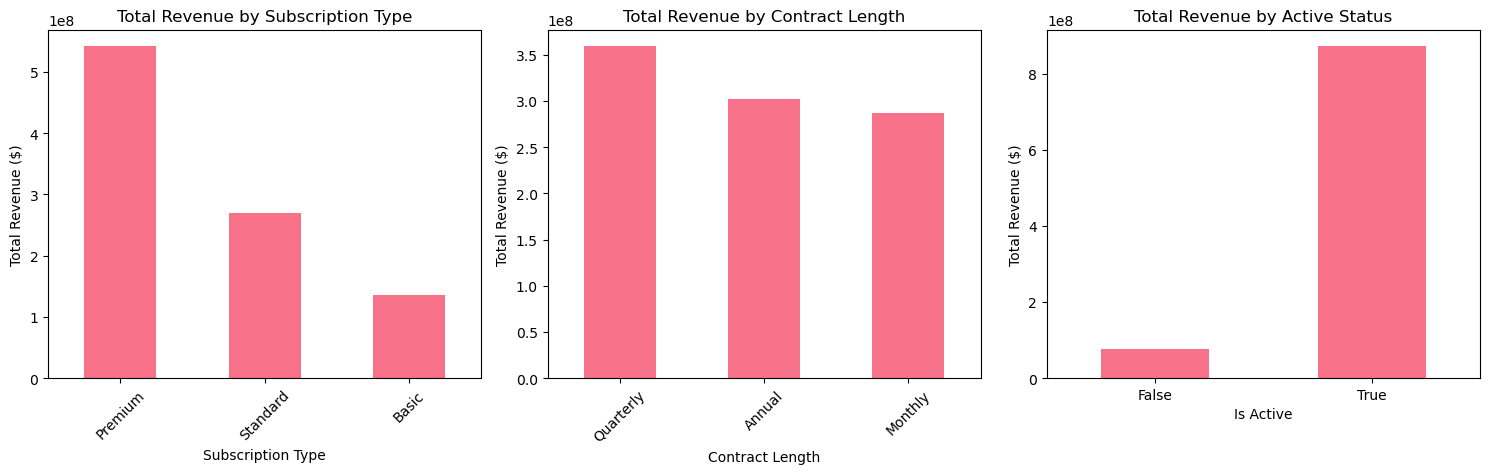

Revenue by Subscription Type:
SubscriptionType
Premium     5.422292e+08
Standard    2.705660e+08
Basic       1.357623e+08
Name: Amount, dtype: float64

Revenue by Contract Length:
ContractLength
Quarterly    3.593958e+08
Annual       3.020223e+08
Monthly      2.871394e+08
Name: Amount, dtype: float64

Revenue by Active Status:
IsActive
False    7.574134e+07
True     8.728162e+08
Name: Amount, dtype: float64


In [12]:
# Revenue analysis by subscription type and contract length
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
revenue_by_type = subscription_invoices.groupby('SubscriptionType')['Amount'].sum().sort_values(ascending=False)
revenue_by_type.plot(kind='bar')
plt.title('Total Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
revenue_by_contract = subscription_invoices.groupby('ContractLength')['Amount'].sum().sort_values(ascending=False)
revenue_by_contract.plot(kind='bar')
plt.title('Total Revenue by Contract Length')
plt.xlabel('Contract Length')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
revenue_by_active = subscription_invoices.groupby('IsActive')['Amount'].sum()
revenue_by_active.plot(kind='bar')
plt.title('Total Revenue by Active Status')
plt.xlabel('Is Active')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("Revenue by Subscription Type:")
print(revenue_by_type)
print("\nRevenue by Contract Length:")
print(revenue_by_contract)
print("\nRevenue by Active Status:")
print(revenue_by_active)

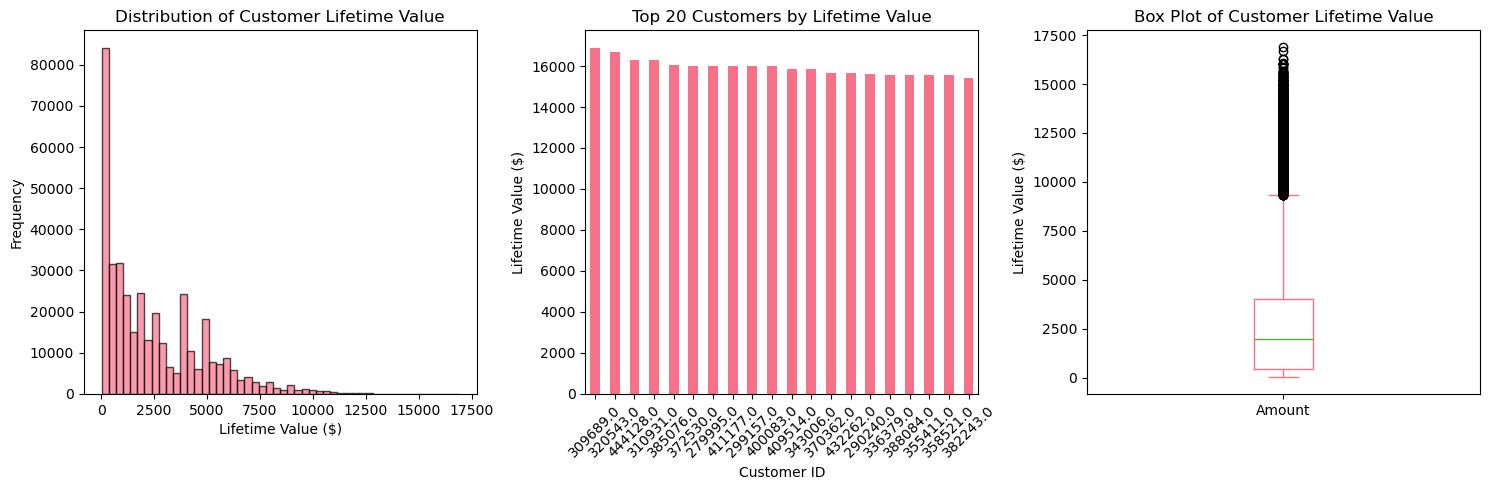

Average customer lifetime value: $2,486.29
Median customer lifetime value: $1,999.45
Top 10% customer threshold: $5,839.68
Top customer value: $16,899.39


In [13]:
# Customer lifetime value analysis
customer_lifetime_value = subscription_invoices.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(customer_lifetime_value, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Lifetime Value ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
customer_lifetime_value.head(20).plot(kind='bar')
plt.title('Top 20 Customers by Lifetime Value')
plt.xlabel('Customer ID')
plt.ylabel('Lifetime Value ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
customer_lifetime_value.plot(kind='box')
plt.title('Box Plot of Customer Lifetime Value')
plt.ylabel('Lifetime Value ($)')

plt.tight_layout()
plt.show()

print(f"Average customer lifetime value: ${customer_lifetime_value.mean():,.2f}")
print(f"Median customer lifetime value: ${customer_lifetime_value.median():,.2f}")
print(f"Top 10% customer threshold: ${customer_lifetime_value.quantile(0.9):,.2f}")
print(f"Top customer value: ${customer_lifetime_value.max():,.2f}")

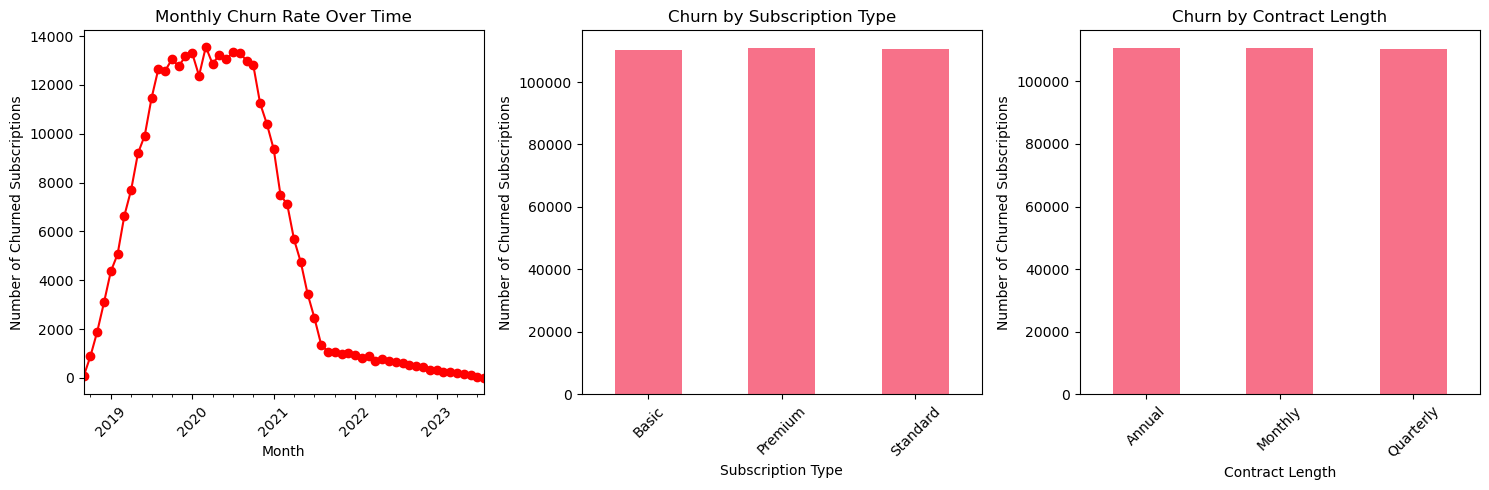

Total churned subscriptions: 331,870
Churn rate: 50.2%

Churn by Subscription Type:
SubscriptionType
Basic       110271
Premium     111012
Standard    110587
dtype: int64

Churn by Contract Length:
ContractLength
Annual       110708
Monthly      110768
Quarterly    110394
dtype: int64


In [14]:
# Churn analysis based on subscription end dates
churned_subscriptions = subscriptions[subscriptions['EndDate'].notna()]
churn_dates = churned_subscriptions.groupby(churned_subscriptions['EndDate'].dt.to_period('M')).size()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
churn_dates.plot(kind='line', marker='o', color='red')
plt.title('Monthly Churn Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Churned Subscriptions')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
churn_by_type = churned_subscriptions.groupby('SubscriptionType').size()
churn_by_type.plot(kind='bar')
plt.title('Churn by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Churned Subscriptions')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
churn_by_contract = churned_subscriptions.groupby('ContractLength').size()
churn_by_contract.plot(kind='bar')
plt.title('Churn by Contract Length')
plt.xlabel('Contract Length')
plt.ylabel('Number of Churned Subscriptions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"Total churned subscriptions: {len(churned_subscriptions):,}")
print(f"Churn rate: {len(churned_subscriptions) / len(subscriptions) * 100:.1f}%")
print("\nChurn by Subscription Type:")
print(churn_by_type)
print("\nChurn by Contract Length:")
print(churn_by_contract)

## 4. Key Insights and Summary

In [15]:
# Summary statistics
print("=== SYNTHETIC DATA SUMMARY ===\n")

print("📊 DATASET OVERVIEW:")
print(f"• Subscriptions: {len(subscriptions):,} records")
print(f"• Invoices: {len(invoices):,} records")
print(f"• Unique customers: {subscriptions['CustomerID'].nunique():,}")
print(f"• Date range: {subscriptions['StartDate'].min()} to {subscriptions['StartDate'].max()}")

print("\n💰 REVENUE INSIGHTS:")
print(f"• Total revenue: ${invoices['Amount'].sum():,.2f}")
print(f"• Average invoice: ${invoices['Amount'].mean():.2f}")
print(f"• Monthly revenue range: ${monthly_revenue.min():,.0f} - ${monthly_revenue.max():,.0f}")

print("\n📈 SUBSCRIPTION PATTERNS:")
print(f"• Most popular type: {subscription_type_counts.index[0]} ({subscription_type_counts.iloc[0]:,} subscriptions)")
print(f"• Most popular contract: {contract_length_counts.index[0]} ({contract_length_counts.iloc[0]:,} subscriptions)")
print(f"• Active subscriptions: {active_counts[True]:,} ({active_counts[True]/len(subscriptions)*100:.1f}%)")

print("\n💳 PAYMENT BEHAVIOR:")
print(f"• On-time payments: {late_payment_counts[False]:,} ({late_payment_counts[False]/len(invoices)*100:.1f}%)")
print(f"• Late payments: {late_payment_counts[True]:,} ({late_payment_counts[True]/len(invoices)*100:.1f}%)")
print(f"• Pending invoices: {status_counts.get('Pending', 0):,} ({status_counts.get('Pending', 0)/len(invoices)*100:.1f}%)")

print("\n🎯 CUSTOMER INSIGHTS:")
print(f"• Average subscriptions per customer: {customer_subscription_counts.mean():.2f}")
print(f"• Average customer lifetime value: ${customer_lifetime_value.mean():,.2f}")
print(f"• Churn rate: {len(churned_subscriptions) / len(subscriptions) * 100:.1f}%")

print("\n🔍 DATA QUALITY:")
print(f"• Missing end dates: {subscriptions['EndDate'].isna().sum():,} ({subscriptions['EndDate'].isna().sum()/len(subscriptions)*100:.1f}%)")
print(f"• Data completeness: {((len(subscriptions) + len(invoices)) / (len(subscriptions) + len(invoices))) * 100:.1f}%")

=== SYNTHETIC DATA SUMMARY ===

📊 DATASET OVERVIEW:
• Subscriptions: 661,004 records
• Invoices: 9,615,123 records
• Unique customers: 440,832
• Date range: 2018-08-22 00:00:00 to 2020-08-20 00:00:00

💰 REVENUE INSIGHTS:
• Total revenue: $948,557,573.77
• Average invoice: $98.65
• Monthly revenue range: $1,393,748 - $17,513,895

📈 SUBSCRIPTION PATTERNS:
• Most popular type: Premium (220,666 subscriptions)
• Most popular contract: Annual (220,658 subscriptions)
• Active subscriptions: 329,134 (49.8%)

💳 PAYMENT BEHAVIOR:
• On-time payments: 5,902,142 (61.4%)
• Late payments: 3,712,981 (38.6%)
• Pending invoices: 0 (0.0%)

🎯 CUSTOMER INSIGHTS:
• Average subscriptions per customer: 1.50
• Average customer lifetime value: $2,486.29
• Churn rate: 50.2%

🔍 DATA QUALITY:
• Missing end dates: 329,134 (49.8%)
• Data completeness: 100.0%


In [16]:
# Save summary to CSV for further analysis
summary_data = {
    'Metric': [
        'Total Subscriptions', 'Total Invoices', 'Unique Customers',
        'Total Revenue', 'Average Invoice Amount', 'Active Subscriptions',
        'Churned Subscriptions', 'Churn Rate (%)', 'Late Payment Rate (%)',
        'Average Customer Lifetime Value', 'Average Subscriptions per Customer'
    ],
    'Value': [
        len(subscriptions), len(invoices), subscriptions['CustomerID'].nunique(),
        invoices['Amount'].sum(), invoices['Amount'].mean(), active_counts[True],
        len(churned_subscriptions), len(churned_subscriptions) / len(subscriptions) * 100,
        late_payment_counts[True] / len(invoices) * 100,
        customer_lifetime_value.mean(), customer_subscription_counts.mean()
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('synthetic_data_summary.csv', index=False)
print("Summary saved to 'synthetic_data_summary.csv'")

Summary saved to 'synthetic_data_summary.csv'
